In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
data_simple = pd.read_csv('data_simple.csv', encoding = "ISO-8859-1", low_memory=False, index_col=0)

In [42]:
def getDfSummary(input_data):
    summary = input_data.describe().transpose()
    summary = summary.drop(['count'], axis=1)

    number_distinct = input_data.unstack().groupby(level=0).nunique(dropna=True)
    number_distinct.name = "number_distinct"

    number_nan = input_data.isnull().sum()
    number_nan.name = "number_nan"
    
    data_type = input_data.dtypes
    data_type.name = "type"

    output_data = pd.concat([data_type,summary, number_distinct, number_nan], axis=1)

    
    return output_data

getDfSummary(data_simple)

,type,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
ADD_DATE,float64,1.991478e+07,7.632035e+05,0.0,19911126.00,19950119.0,19971007.00,19991116.0,3306,129315
AREG_SEQ_NBR,int64,1.000000e+00,0.000000e+00,1.0,1.00,1.0,1.00,1.0,1,0
ARREST_CREDIT_CODE,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,133502
ARREST_DATE,float64,1.955671e+07,2.748079e+06,0.0,19910830.00,19941025.0,19970731.00,19991115.0,4259,129315
BOFI_NBR,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124848,1
CHARGE_CAT,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,229739
CHARGE_CLASS,float64,3.328816e+00,8.820815e-01,1.0,3.00,3.0,4.00,8.0,8,131749
CHARGE_TYPE,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,129846
CRIMINAL_FLAG,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
DFDN_SEQ_NBR,int64,1.097765e+00,4.838954e-01,1.0,1.00,1.0,1.00,27.0,27,0


In [43]:
#verify that 'BOFI_NBR','DFDN_SEQ_NBR','SYS_NBR', 'SADA_CODE', 'AREG_SEQ_NBR' uniquely identify this table
#each row represents an arrest
data_simple[data_simple.duplicated(['BOFI_NBR','DFDN_SEQ_NBR','SYS_NBR', 'SADA_CODE', 'AREG_SEQ_NBR'],keep=False)]

,SADA_CODE,AREG_SEQ_NBR,BOFI_NBR,DFDN_SEQ_NBR,SCREENING_DISP_CODE,SYS_NBR,POLICE_RPT_DATE,POLICE_RPT_DAYS,SCREENING_DAYS,SCREENING_DISP_DATE,...,SADA_RACE,SADA_SEX,SADA_PARTY,SADA_ALT_PARTY,JUVENILE_FLAG,CRIMINAL_FLAG,FBI_NBR,DOB,SEX,RACE


In [44]:
data_simple['CHRG_ACCEPTED'] = np.where(data_simple['SCREENING_DISP_CODE']==230,1,0)
data_simple['CHRG_REJECTED'] = np.where(data_simple['SCREENING_DISP_CODE']!=230,1,0)

In [45]:
by_sada = data_simple.groupby(['SADA_CODE'])['CHRG_ACCEPTED','CHRG_REJECTED'].sum()

In [179]:
by_sada.shape

(302, 4)

In [172]:
by_sada['NBR_CASES'] = by_sada['CHRG_ACCEPTED'] + by_sada['CHRG_REJECTED'] 
by_sada['CHRG_RATE'] = by_sada['CHRG_ACCEPTED']/(by_sada['NBR_CASES'])

In [173]:
getDfSummary(by_sada)

,type,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
CHRG_ACCEPTED,int32,360.062914,806.982328,0.0,4.000000,22.500000,261.750000,6423.0,159,0
CHRG_REJECTED,int32,477.874172,1152.450253,0.0,1.000000,21.000000,437.500000,10671.0,153,0
CHRG_RATE,float64,0.572253,0.307570,0.0,0.377527,0.564272,0.837661,1.0,193,0
NBR_CASES,int32,837.937086,1910.870086,1.0,6.000000,51.000000,727.750000,17094.0,175,0


(array([ 257.,   24.,   11.,    4.,    2.,    2.,    1.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.71030000e+03,   3.41960000e+03,
          5.12890000e+03,   6.83820000e+03,   8.54750000e+03,
          1.02568000e+04,   1.19661000e+04,   1.36754000e+04,
          1.53847000e+04,   1.70940000e+04]),
 <a list of 10 Patch objects>)

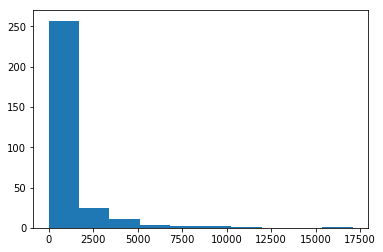

In [174]:
#histogram of number of cases seen by each screener
plt.hist(by_sada['NBR_CASES'])

(array([ 31.,   7.,  11.,  43.,  37.,  35.,  32.,  20.,  28.,  58.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

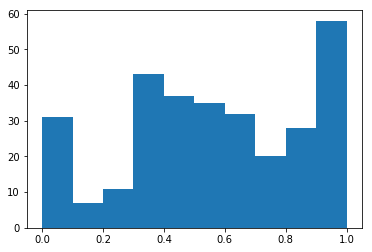

In [168]:
#plot histogram ofr acceptance rate

#drop
plt.hist(by_sada['CHRG_RATE'])

In [114]:
def to_date(col):
    '''Given a pandas series, returns pandas dates for non-missing valid dates'''
    col.dropna(inplace=True)
    col = col[col!=0]
    col = col.astype(int)
    converted = pd.to_datetime(col, format='%Y%m%d')
    return converted
    
    
    

In [142]:
compare_dates=pd.DataFrame()
compare_dates['ADD_DATE'] = to_date(data_simple['ADD_DATE'])
compare_dates['ARREST_DATE'] = to_date(data_simple['ARREST_DATE'])

In [144]:
compare_dates['DATE_CHECK'] = compare_dates['ADD_DATE']==compare_dates['ARREST_DATE']

In [156]:
compare_dates[(compare_dates['DATE_CHECK']==False)&(pd.isnull(compare_dates['ARREST_DATE'])==False)].shape

(102204, 3)

In [208]:
compare_dates['YEAR'] = pd.DatetimeIndex(compare_dates['ARREST_DATE']).year 
compare_dates['MONTH'] = pd.DatetimeIndex(compare_dates['ARREST_DATE']).month 
compare_dates['YM'] = compare_dates['ARREST_DATE'].map(lambda x: x.strftime('%Y-%m') if pd.notnull(x) else '') 


In [184]:
#NUMBER_DISTINCT is wrong for ARREST_DATE.  Unique column is right.
getDfSummary(compare_dates)

,type,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
ADD_DATE,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN,3305,0
ARREST_DATE,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN,4258,2702
DATE_CHECK,bool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
YEAR,float64,1994.215628,3.287641,1901.0,1991.0,1994.0,1997.0,1999.0,40,2702


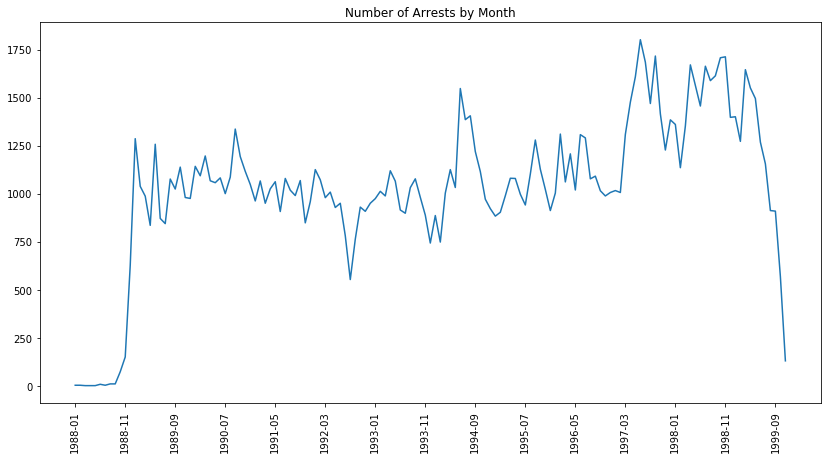

In [244]:
by_ym = compare_dates[compare_dates['YEAR']>=1988].groupby('YM')['YM'].count()
plt.figure(figsize=(14, 7))
plt.title('Number of Arrests by Month')
plt.plot(np.arange(0,len(by_ym)),by_ym)
plt.tick_params(which='major')
plt.xticks(np.arange(0,len(by_ym),10), by_ym.index[::10], rotation='vertical');

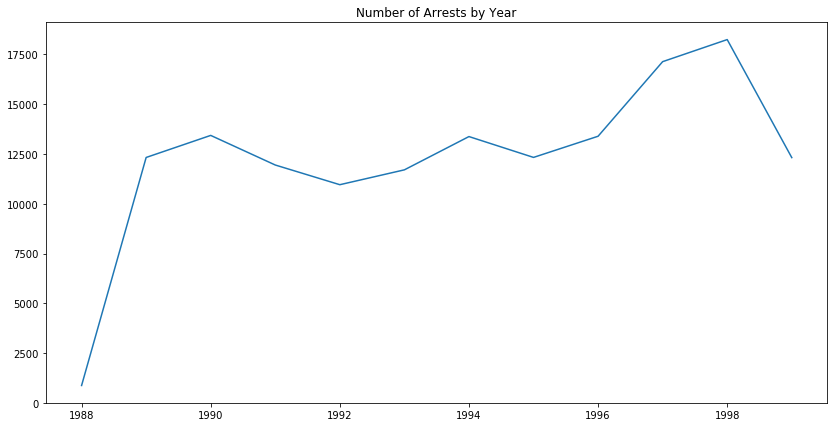

In [255]:
by_year = compare_dates[compare_dates['YEAR']>=1988].groupby('YEAR')['YEAR'].count()
plt.figure(figsize=(14, 7))
plt.title('Number of Arrests by Year')
plt.plot(by_ym.index,by_year)

In [253]:
plt.axis

<function matplotlib.pyplot.axis>